In [1]:
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X_train = pickle.load(open('/data/data_science/data/image_banned/DataProcessing/X_train_new.pkl','rb'))
Y_train = pickle.load(open('/data/data_science/data/image_banned/DataProcessing/Y_train_new.pkl','rb'))
X_test = pickle.load(open('/data/data_science/data/image_banned/DataProcessing/X_test_new.pkl','rb'))
Y_test = pickle.load(open('/data/data_science/data/image_banned/DataProcessing/Y_test_new.pkl','rb'))
X_val = pickle.load(open('/data/data_science/data/image_banned/DataProcessing/X_val_new.pkl','rb'))
Y_val = pickle.load(open('/data/data_science/data/image_banned/DataProcessing/Y_val_new.pkl','rb'))

In [3]:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
Y_train = keras.utils.np_utils.to_categorical(Y_train)
Y_val = keras.utils.np_utils.to_categorical(Y_val)

In [5]:
IMG_SIZE = 128
model = Sequential()
width = 128
height = 128
classes = 2
shape = (width, height, 3)

2021-08-24 15:38:29.717863: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-24 15:38:29.718070: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MICZONE-ML03): /proc/driver/nvidia/version does not exist


In [6]:
model.add(Conv2D(16, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0

In [9]:
csv_logger = keras.callbacks.CSVLogger("/data/data_science/data/image_banned/Result/log_6.csv",separator=',',append=True)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_data =(X_val,Y_val),batch_size=32,verbose = 1,use_multiprocessing=True,workers = 20,callbacks=(csv_logger))

2021-08-24 15:38:31.064849: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37164613632 exceeds 10% of free system memory.
2021-08-24 15:39:22.494899: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
 622/5908 [==>...........................] - ETA: 1:36:38 - loss: 0.6258 - accuracy: 0.7137

In [ ]:
model.save("/data/data_science/data/image_banned/Result/model_6.h5")

In [13]:
print("done")

done


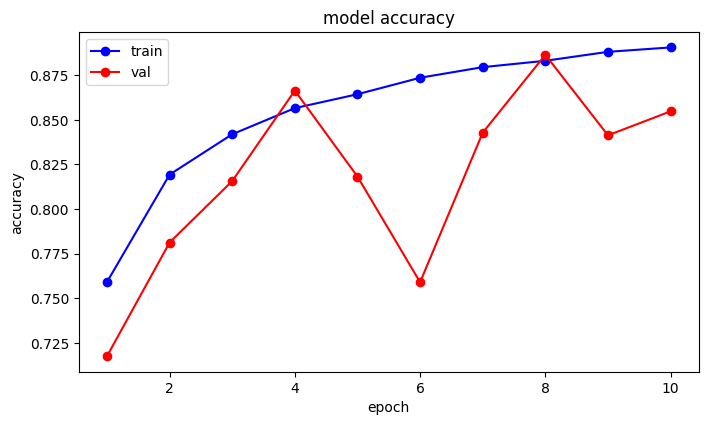

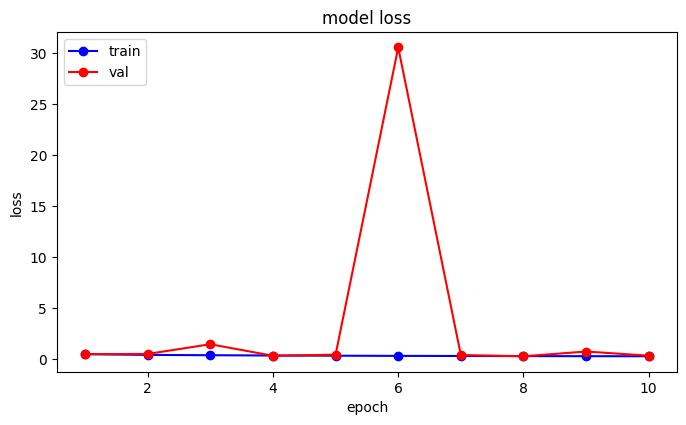

In [14]:
epoch = np.arange(1,11)
plt.figure(figsize = (8,4.5),dpi=100)
plt.plot(epoch,history.history['accuracy'],"-",color="b",label='train_accuracy',marker="o")
plt.plot(epoch,history.history['val_accuracy'],"-",color="r",label="val_accuracy",marker="o")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (8,4.5),dpi=100)
plt.plot(epoch,history.history['loss'],"-",color="b",label="train_loss",marker="o")
plt.plot(epoch,history.history['val_loss'],"-",color="r",label="val_loss",marker="o")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
pred = model.predict(X_test)
pred_idx = np.argmax(pred, axis=1)

In [17]:
print(classification_report(Y_test, pred_idx))

              precision    recall  f1-score   support

           0       0.89      0.56      0.68     16439
           1       0.85      0.97      0.91     41734

    accuracy                           0.85     58173
   macro avg       0.87      0.76      0.79     58173
weighted avg       0.86      0.85      0.84     58173



In [18]:
cm = confusion_matrix(Y_test,pred_idx)

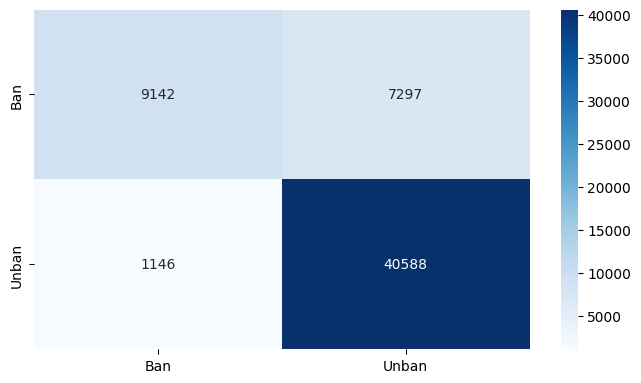

In [19]:
df_cm = pd.DataFrame(cm, index=['Ban',"Unban"], columns=['Ban',"Unban"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='d')
plt.show()